In [1]:
# import packages
import pandas as pd


In [2]:
# load the dataset
df=pd.read_csv("/content/Employee_Salaries.csv")
df.head()

,Department,Department_Name,Division,Gender,Base_Salary,Overtime_Pay,Longevity_Pay,Grade
0,ABS,Alcohol Beverage Services,ABS 85 Administration,M,175873.000,0.00,0.0,M2
1,ABS,Alcohol Beverage Services,ABS 85 Administration,M,145613.360,0.00,0.0,M3
2,ABS,Alcohol Beverage Services,ABS 85 Administration,F,136970.000,0.00,0.0,M3
3,ABS,Alcohol Beverage Services,ABS 85 Administrative Services,F,89432.694,0.00,2490.0,21
4,ABS,Alcohol Beverage Services,ABS 85 Administrative Services,F,78947.000,456.68,6257.7,16


In [3]:
df.shape #shape

(10291, 8)

In [4]:
df.info() #information

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10291 entries, 0 to 10290
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Department       10291 non-null  object 
 1   Department_Name  10291 non-null  object 
 2   Division         10291 non-null  object 
 3   Gender           10291 non-null  object 
 4   Base_Salary      10291 non-null  float64
 5   Overtime_Pay     10291 non-null  float64
 6   Longevity_Pay    10291 non-null  float64
 7   Grade            10258 non-null  object 
dtypes: float64(3), object(5)
memory usage: 643.3+ KB


In [5]:
df.isnull().sum()

,0
Department,0
Department_Name,0
Division,0
Gender,0
Base_Salary,0
Overtime_Pay,0
Longevity_Pay,0
Grade,33


In [6]:
df['Grade']=df['Grade'].fillna(0)

In [7]:
df.isnull().sum()

,0
Department,0
Department_Name,0
Division,0
Gender,0
Base_Salary,0
Overtime_Pay,0
Longevity_Pay,0
Grade,0


In [11]:
df.dtypes

,0
Department,object
Department_Name,object
Division,object
Gender,object
Base_Salary,float64
Overtime_Pay,float64
Longevity_Pay,float64


In [14]:
categorical_columns=df.select_dtypes(include=['object']) #categorical columns
categorical_columns

,Department,Department_Name,Division,Gender
0,ABS,Alcohol Beverage Services,ABS 85 Administration,M
1,ABS,Alcohol Beverage Services,ABS 85 Administration,M
2,ABS,Alcohol Beverage Services,ABS 85 Administration,F
3,ABS,Alcohol Beverage Services,ABS 85 Administrative Services,F
4,ABS,Alcohol Beverage Services,ABS 85 Administrative Services,F
...,...,...,...,...
10286,TBS,Department of Technology and Enterprise Busine...,TBS 34 OSP Low Code Governance and Administration,M
10287,ZAH,Office of Zoning and Administrative Hearings,ZAH 05 Director,F
10288,ZAH,Office of Zoning and Administrative Hearings,ZAH 05 Office of Zoning and Administrative Hea...,F
10289,ZAH,Office of Zoning and Administrative Hearings,ZAH 05 Zoning and Administrative Hearings,F


In [15]:
from sklearn.preprocessing import LabelEncoder      #encoding method for change categorical values to numerical values
le=LabelEncoder()
for col in categorical_columns:
  df[col]=le.fit_transform(df[col])

In [16]:
df.head()

,Department,Department_Name,Division,Gender,Base_Salary,Overtime_Pay,Longevity_Pay
0,0,0,0,1,175873.000,0.00,0.0
1,0,0,0,1,145613.360,0.00,0.0
2,0,0,0,0,136970.000,0.00,0.0
3,0,0,1,0,89432.694,0.00,2490.0
4,0,0,1,0,78947.000,456.68,6257.7


In [97]:
df.describe() #descriptive statics

,Department,Department_Name,Division,Gender,Base_Salary1,Overtime_Pay_1,Longevity_Pay_1
count,10291.000000,10291.000000,10291.000000,10291.000000,10291.000000,10291.000000,10291.000000
mean,19.219415,14.448644,315.482266,0.576134,89161.071084,6949.021398,1393.976914
std,11.110517,7.445491,155.125869,0.494194,28165.224284,11719.012923,2746.236318
min,0.000000,0.000000,0.000000,0.000000,11147.240000,0.000000,0.000000
25%,12.000000,11.000000,196.000000,0.000000,70023.000000,0.000000,0.000000
50%,17.000000,14.000000,343.000000,1.000000,87328.000000,258.420000,0.000000
75%,29.000000,18.000000,428.000000,1.000000,108084.000000,9190.970000,1225.680000
max,41.000000,41.000000,626.000000,1.000000,147354.000000,41041.885000,9340.820000


In [98]:
df.corr() #correlations

,Department,Department_Name,Division,Gender,Base_Salary1,Overtime_Pay_1,Longevity_Pay_1
Department,1.000000,0.455460,0.956781,-0.076158,0.105384,-0.053783,0.170275
Department_Name,0.455460,1.000000,0.462572,0.100152,0.132741,0.100858,0.036480
Division,0.956781,0.462572,1.000000,-0.132375,0.113642,-0.075654,0.159758
Gender,-0.076158,0.100152,-0.132375,1.000000,0.083285,0.314010,0.093351
Base_Salary1,0.105384,0.132741,0.113642,0.083285,1.000000,0.080979,0.324154
Overtime_Pay_1,-0.053783,0.100858,-0.075654,0.314010,0.080979,1.000000,0.190001
Longevity_Pay_1,0.170275,0.036480,0.159758,0.093351,0.324154,0.190001,1.000000


In [17]:
df['Department'].unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41])

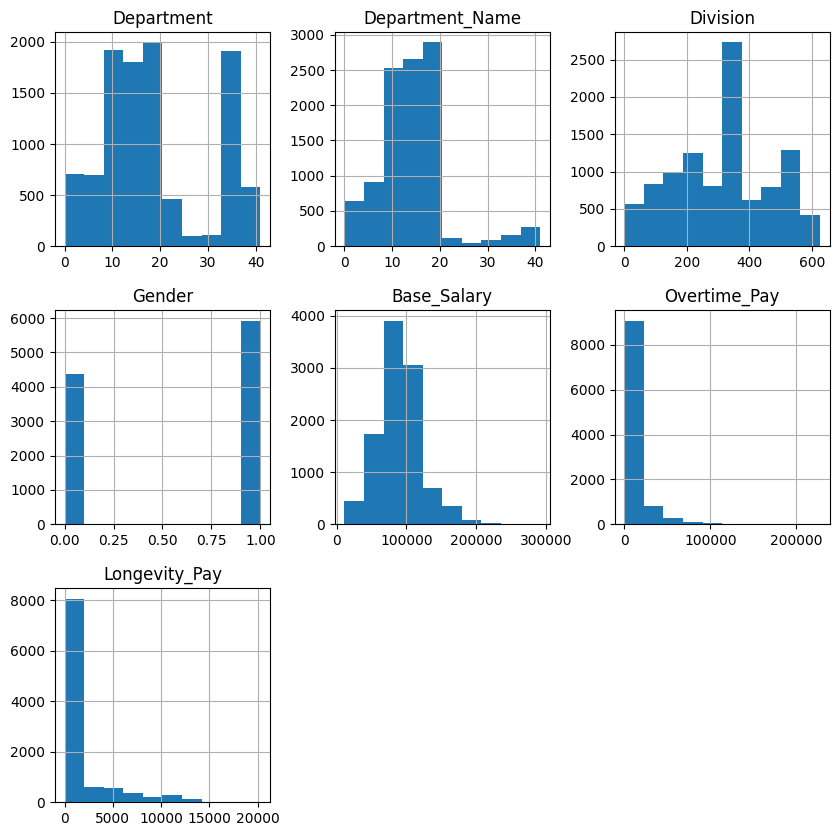

In [19]:
# univarient analysis - to deal with single variable
# histogram plot
import seaborn as sns
import matplotlib.pyplot as plt
df.hist(figsize=(10,10))
plt.show()

In [ ]:
# Department:
# The distribution is bimodal, with two prominent peaks indicating that there are two departments with significantly higher frequencies than others.

# Department_Name:
# The distribution appears right-skewed, meaning that most of the data points are concentrated towards the left side of the histogram (lower values), with fewer occurrences as you move to the right. This indicates that a few department names are much more common than the rest.

# Division:
# The distribution shows multiple peaks, suggesting a multimodal distribution where several divisions have varying but significant counts. The spread of the data seems relatively even across some categories, but with noticeable peaks at specific divisions.

# Gender:
# This appears to be a categorical or binary distribution, likely representing two categories, such as Male (0) and Female (1), or vice versa. The two bars indicate the counts for each gender category. The distribution seems fairly balanced but not perfectly equal, as the bars are of different heights.

# Base_Salary:
# The Base_Salary histogram shows a right-skewed distribution. This means most individuals have a base salary concentrated on the lower end of the spectrum, with fewer individuals earning higher salaries. The skewness indicates that the mean salary is higher than the median salary.

# Overtime_Pay:
# Similar to Base_Salary, the Overtime_Pay histogram also shows a right-skewed distribution. The majority of individuals have little to no overtime pay, with a long tail extending to the right, indicating some individuals receive significantly higher overtime pay.

# Longevity_Pay:
# This histogram shows a highly right-skewed distribution, with most individuals receiving low or no longevity pay. There is a long tail on the right side, indicating that a small number of individuals receive much higher longevity pay.

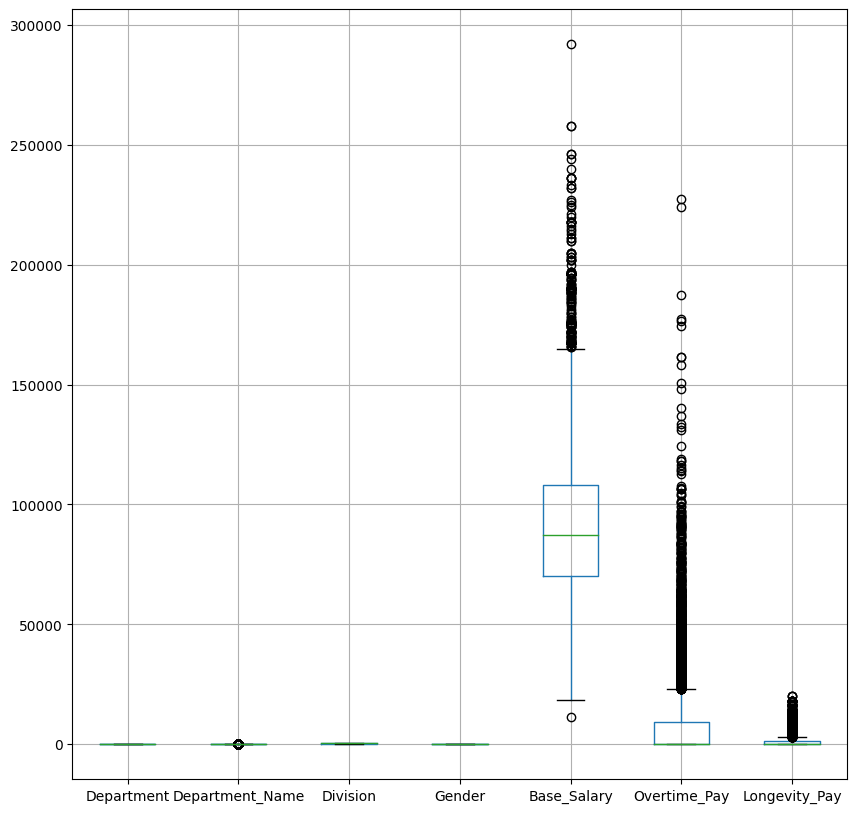

In [20]:
df.boxplot(figsize=(10,10))
plt.show()

In [ ]:
# observations:

# the boxplot to find outliers in the each column.
# we are observed, the base salary, overtime_pay, longevity_pay these columns are comtaims outliers
# overtime_pay have more outliers compared to others.


In [26]:
df=df.drop(['is_outlier_iqr'],axis=1)

In [27]:
df.head()

,Department,Department_Name,Division,Gender,Base_Salary,Overtime_Pay,Longevity_Pay
0,0,0,0,1,175873.000,0.00,0.0
1,0,0,0,1,145613.360,0.00,0.0
2,0,0,0,0,136970.000,0.00,0.0
3,0,0,1,0,89432.694,0.00,2490.0
4,0,0,1,0,78947.000,456.68,6257.7


In [109]:
def distplot(df): ## Creating a function which will plot the kde plot of the df
    plt.figure(figsize=(8,8))
    sns.kdeplot(df)
    plt.title('Density Plot')
    plt.show()

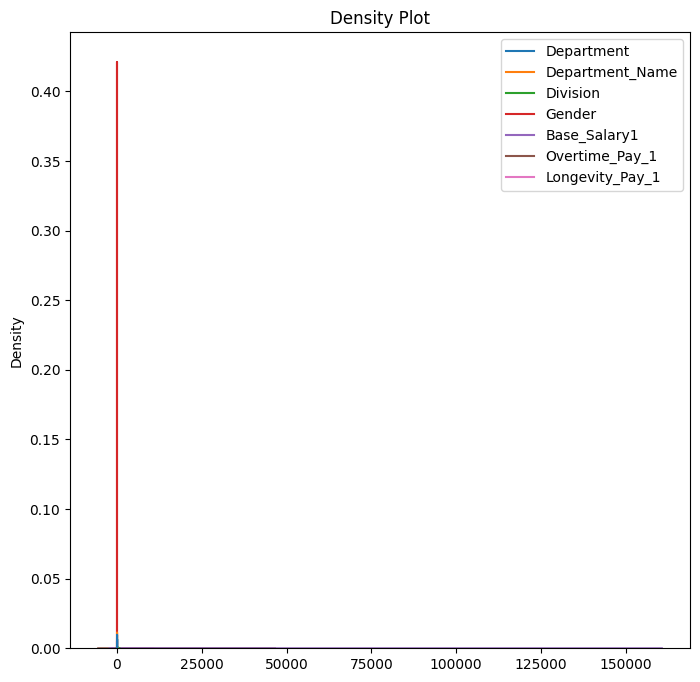

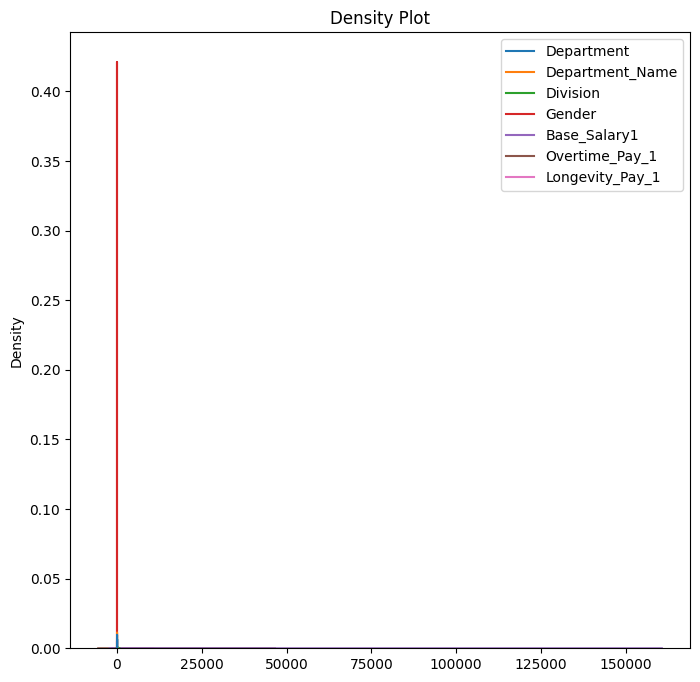

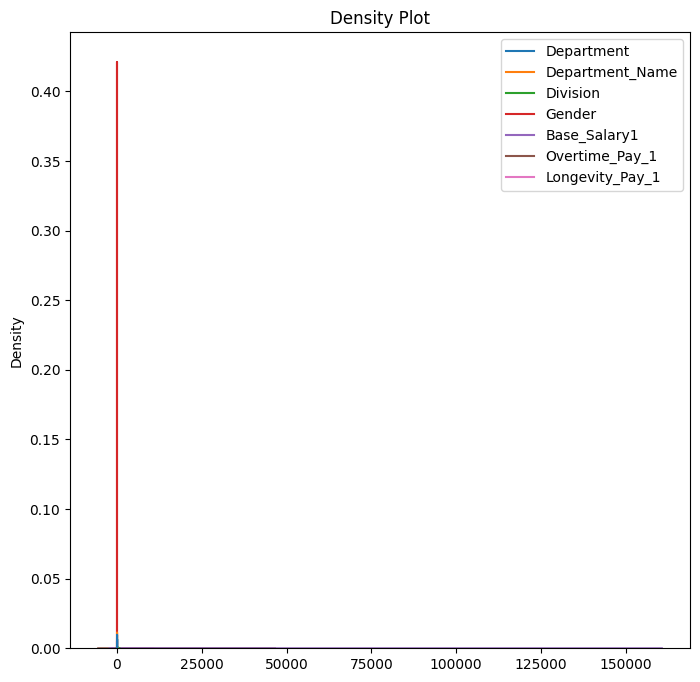

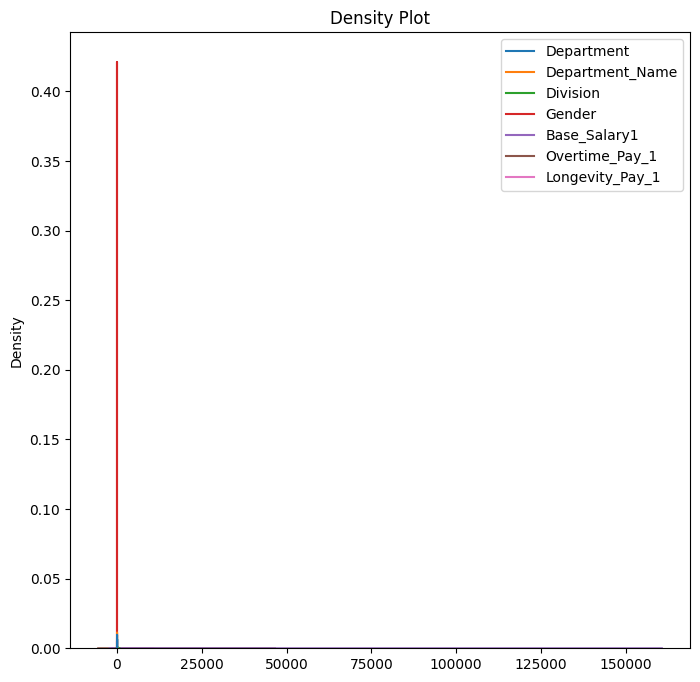

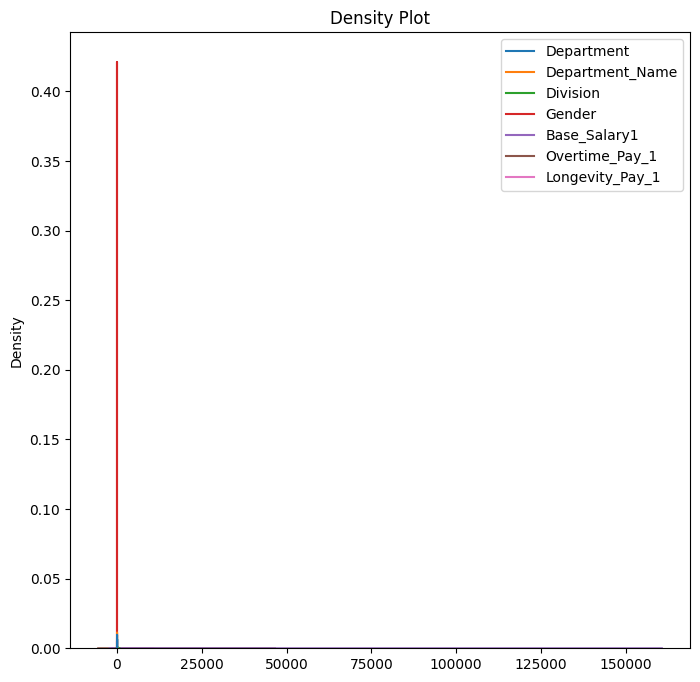

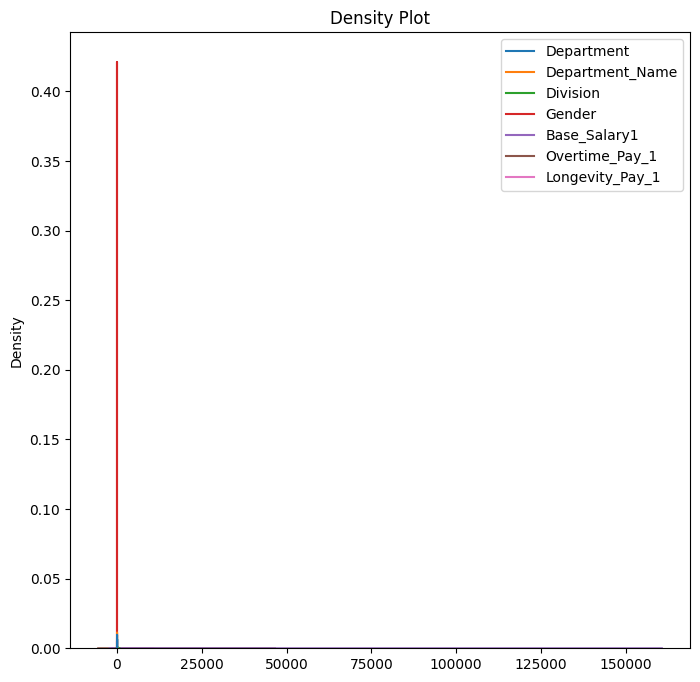

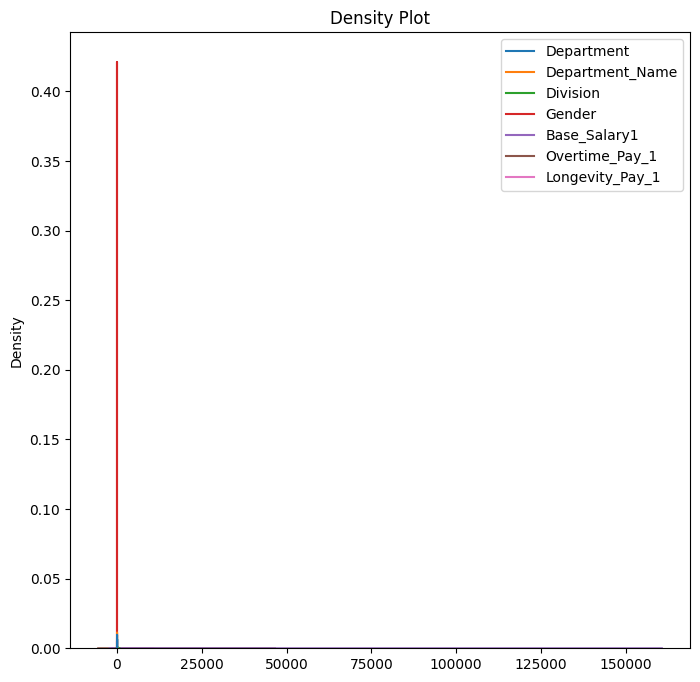

In [110]:
for dfs in df:
    distplot(df)

Text(0, 0.5, '% of borrowers')

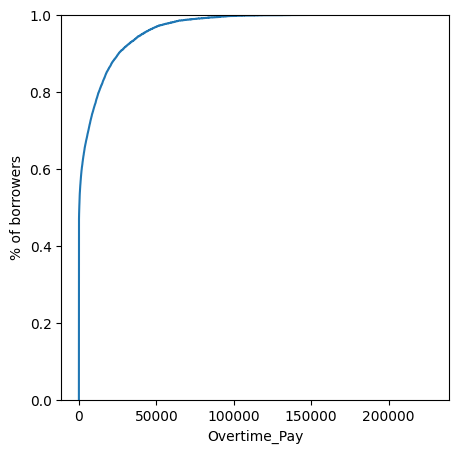

In [36]:
# ecdf plot
plt.figure(figsize=(5,5))
sns.ecdfplot(data=df,x='Overtime_Pay') ## To create an Empirical Cumulative Distribution Function (ECDF) plot for Overtime_Pay,
plt.ylabel('% of borrowers')

In [ ]:
#  observations:

# This type of plot helps visualize the proportion of data points that fall below a certain value in a dataset.
# Allowing you to see what fraction of the data falls below various thresholds. For instance, you can quickly determine what proportion of employees earn less than a certain amount in overtime pay.

Text(0, 0.5, '% of borrowers')

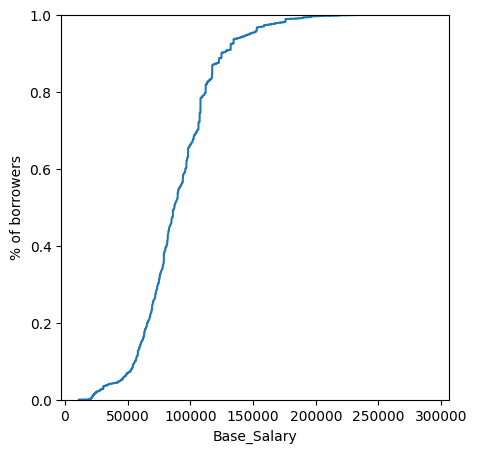

In [37]:
plt.figure(figsize=(5,5))
sns.ecdfplot(data=df,x='Base_Salary') ## plotting the ecdf plot of base_salary
plt.ylabel('% of borrowers')

Text(0, 0.5, '% of borrowers')

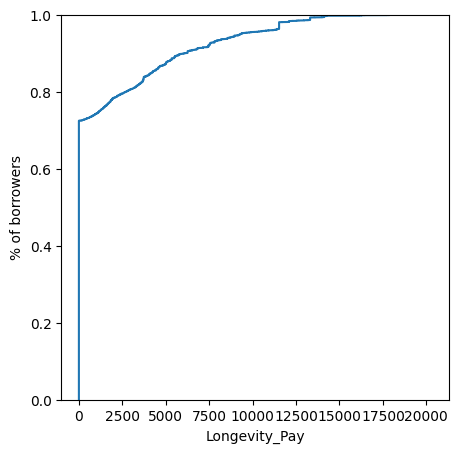

In [38]:
plt.figure(figsize=(5,5))
sns.ecdfplot(data=df,x='Longevity_Pay') ## plotting the ecdf plot of Longevity_Pay
plt.ylabel('% of borrowers')

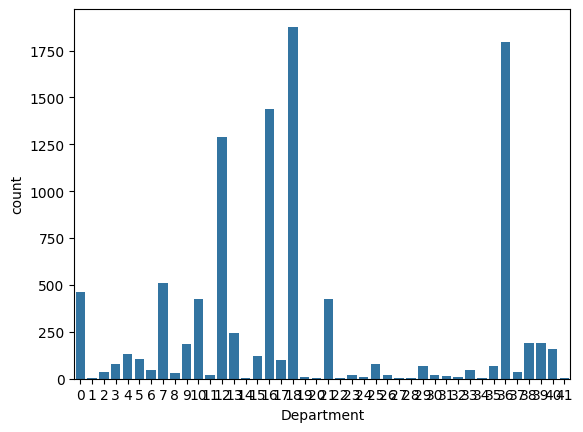

In [41]:
# counplot
sns.countplot(x="Department",data=df)
plt.show()

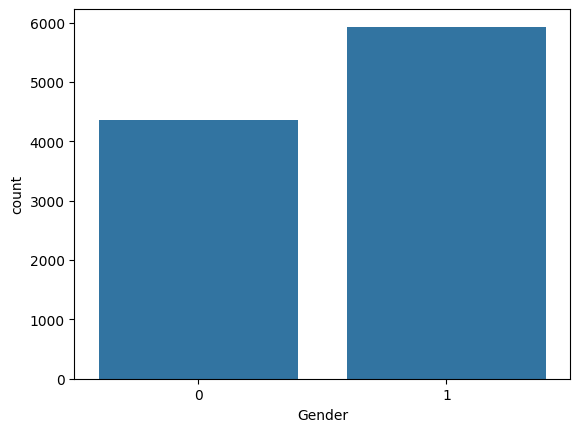

In [42]:
sns.countplot(x="Gender",data=df)
plt.show()

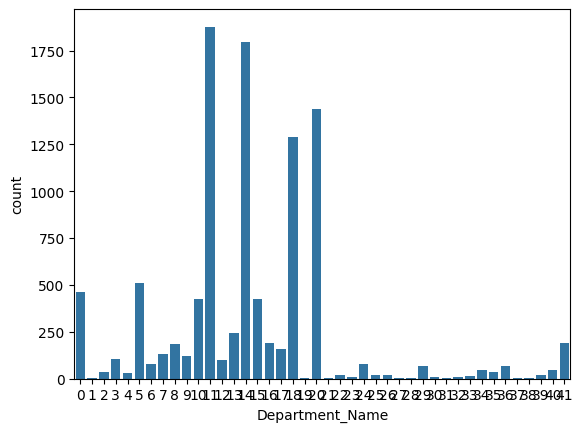

In [44]:
sns.countplot(x="Department_Name",data=df)
plt.show()

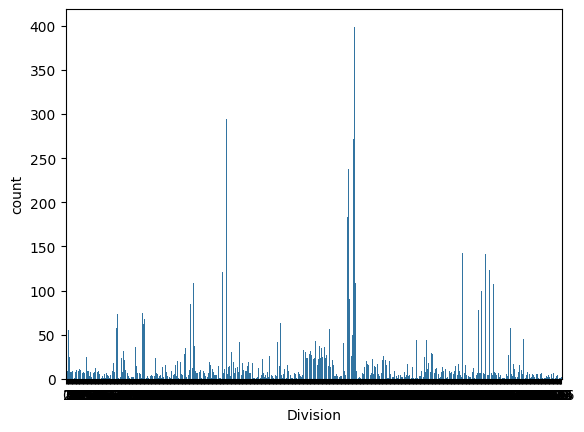

In [46]:
sns.countplot(x="Division",data=df)
plt.show()

In [ ]:
# Bivariate Analysis/Multivariate Analysis
# Numerical vs Numerical
# Numerical vs Categorical
# Categorical vs Categorical

<Axes: xlabel='Department', ylabel='Department_Name'>

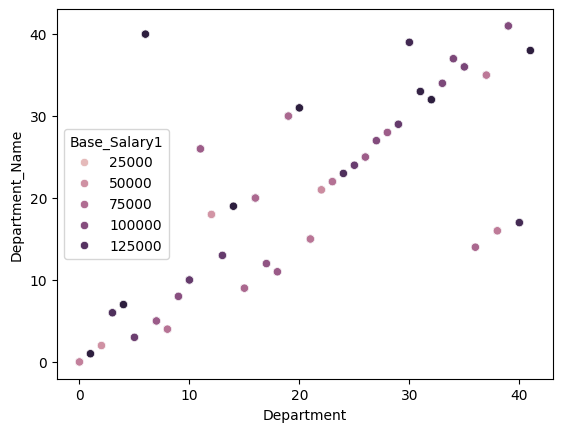

In [100]:
# scattorplot
sns.scatterplot(x=df['Department'],y=df['Department_Name'],hue=df['Base_Salary1'])


<Axes: xlabel='Department', ylabel='Department_Name'>

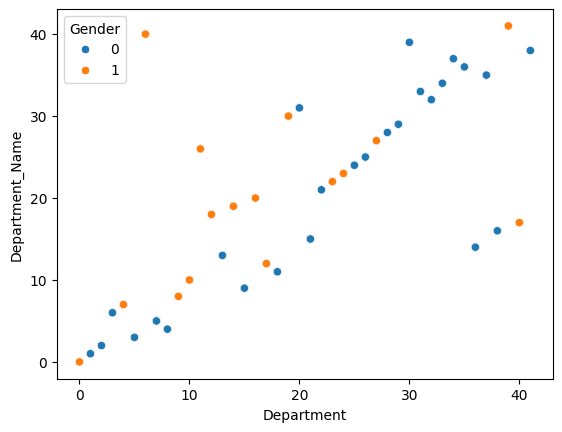

In [53]:
sns.scatterplot(x=df['Department'],y=df['Department_Name'],hue=df['Gender'])

<Axes: xlabel='Division', ylabel='Department_Name'>

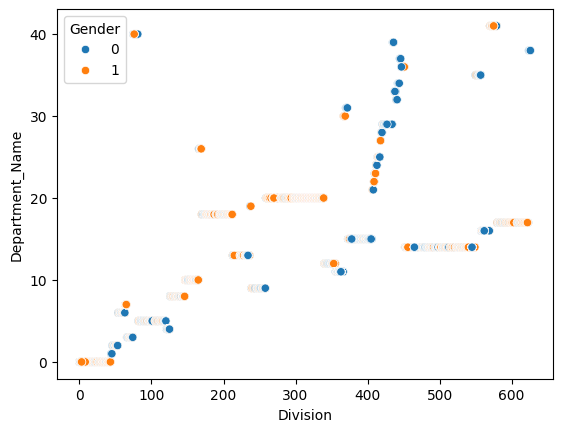

In [54]:
sns.scatterplot(x=df['Division'],y=df['Department_Name'],hue=df['Gender'])

<Axes: xlabel='Base_Salary', ylabel='Department_Name'>

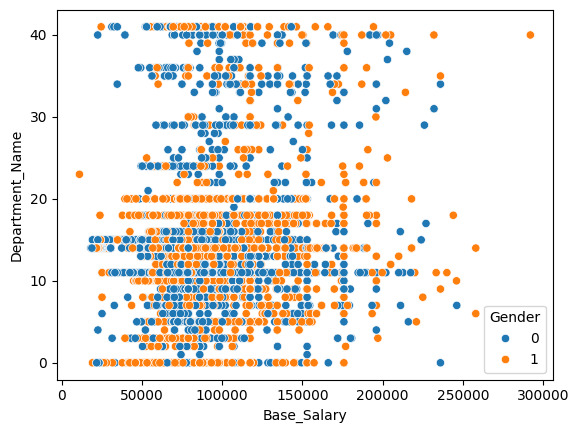

In [55]:
sns.scatterplot(x=df['Base_Salary'],y=df['Department_Name'],hue=df['Gender'])

<Axes: xlabel='Overtime_Pay', ylabel='Department_Name'>

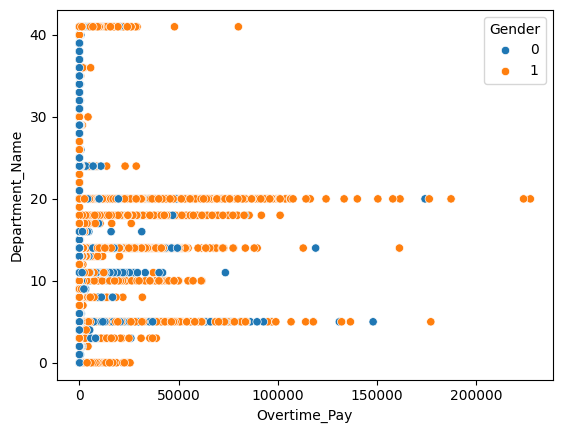

In [56]:
sns.scatterplot(x=df['Overtime_Pay'],y=df['Department_Name'],hue=df['Gender'])

<Axes: xlabel='Overtime_Pay_1', ylabel='Longevity_Pay_1'>

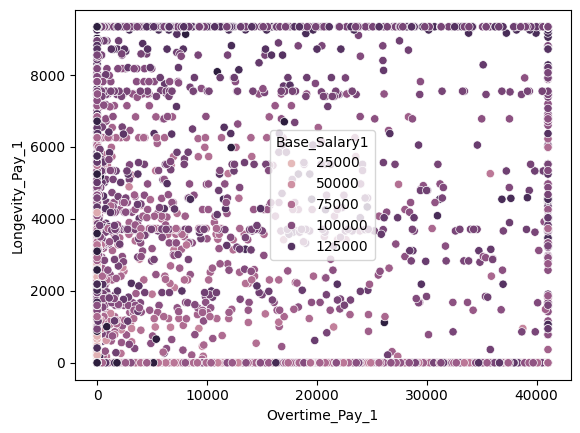

In [102]:
# Overtime_Pay	Longevity_Pay
sns.scatterplot(x=df['Overtime_Pay_1'],y=df['Longevity_Pay_1'],hue=df['Base_Salary1'])

<Axes: xlabel='Division', ylabel='Department_Name'>

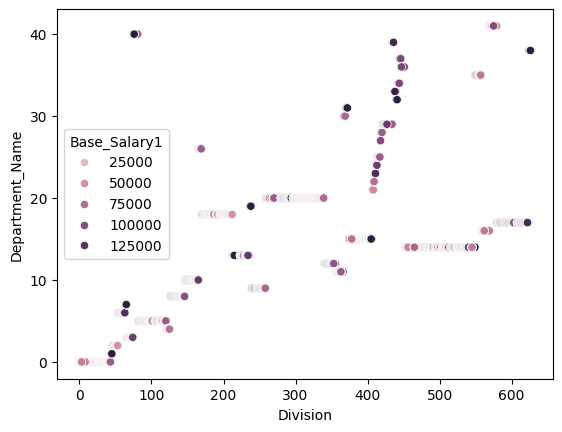

In [103]:
sns.scatterplot(x=df['Division'],y=df['Department_Name'],hue=df['Base_Salary1'])

<Axes: xlabel='Base_Salary', ylabel='Density'>

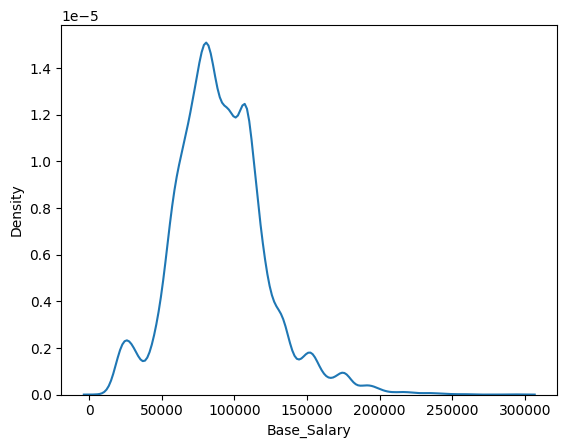

In [60]:
sns.kdeplot(data=df,x='Base_Salary',gridsize=200) ## Plotiing the kde plot for Base Salary

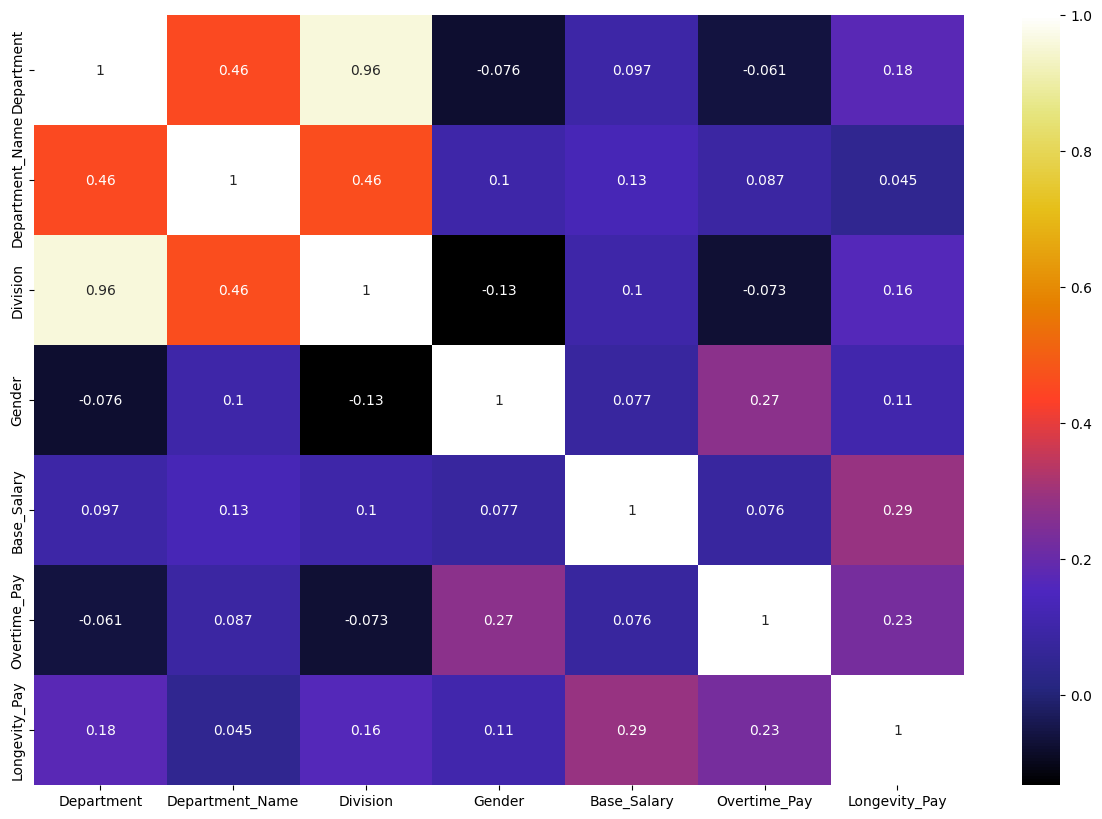

In [62]:
# headmap
plt.figure(figsize=(15,10))
corr=df.corr()
sns.heatmap(corr,annot=True,cmap=plt.cm.CMRmap)
plt.show()

In [ ]:
# observations:

# headmap will be used into how much strength have in data set
# division has been highly correlated to department.

In [73]:
# handling outliers
# Capping outliers
import numpy as np
cap_value = df['Base_Salary'].quantile(0.95)
df['Base_Salary1'] = np.where(df['Base_Salary'] > cap_value, cap_value, df['Base_Salary'])


In [75]:
df=df.drop(['data_column_capped'],axis=1)
df=df.drop(['Base_Salary'],axis=1)


In [76]:
df.head()

,Department,Department_Name,Division,Gender,Overtime_Pay,Longevity_Pay,Base_Salary1
0,0,0,0,1,0.00,0.0,147354.000
1,0,0,0,1,0.00,0.0,145613.360
2,0,0,0,0,0.00,0.0,136970.000
3,0,0,1,0,0.00,2490.0,89432.694
4,0,0,1,0,456.68,6257.7,78947.000


In [78]:
# Capping outliers
import numpy as np
cap_value = df['Overtime_Pay'].quantile(0.95)
df['Overtime_Pay_1'] = np.where(df['Overtime_Pay'] > cap_value, cap_value, df['Overtime_Pay'])

In [80]:
# Capping outliers
import numpy as np
cap_value = df['Longevity_Pay'].quantile(0.95)
df['Longevity_Pay_1'] = np.where(df['Longevity_Pay'] > cap_value, cap_value, df['Longevity_Pay'])

In [82]:
df=df.drop(['Overtime_Pay'],axis=1)
df=df.drop(['Longevity_Pay'],axis=1)

In [83]:
df.head()

,Department,Department_Name,Division,Gender,Base_Salary1,Overtime_Pay_1,Longevity_Pay_1
0,0,0,0,1,147354.000,0.00,0.0
1,0,0,0,1,145613.360,0.00,0.0
2,0,0,0,0,136970.000,0.00,0.0
3,0,0,1,0,89432.694,0.00,2490.0
4,0,0,1,0,78947.000,456.68,6257.7


In [ ]:
# After handling outliers observations
# To handle outliers and change the column names like Base_Salary1	Overtime_Pay_1	Longevity_Pay_1
# outliers affect the model accuracy so, we are using capping method, its help to change into outlier values to corrected values

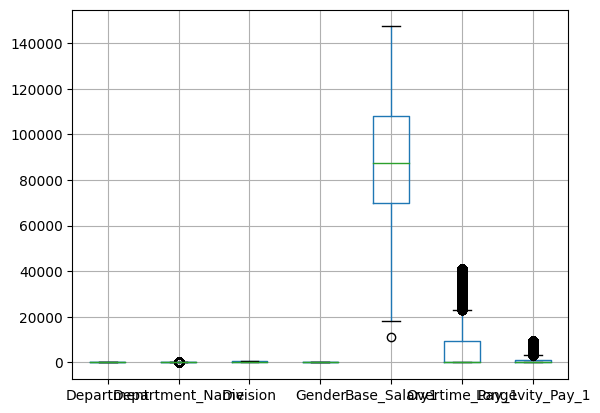

In [84]:
# boxplot
df.boxplot()
plt.show()

In [85]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [87]:
# Features and target
X = df.drop(['Base_Salary1'],axis=1)
y=df['Base_Salary1']


In [88]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and fit the model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [89]:
# Predict on the test set
y_pred = model.predict(X_test)

In [90]:
# Calculate performance metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")
print(f"Intercept: {model.intercept_}")
print(f"Coefficients: {model.coef_}")

Mean Squared Error: 683412799.1922675
R^2 Score: 0.13819010398500853
Intercept: 75735.64108849682
Coefficients: [-3.75900766e+02  3.86451543e+02  2.89048448e+01  3.15445121e+03
 -1.91639392e-02  3.20575975e+00]


In [91]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error

In [92]:
# For the sake of example, let's create a synthetic dataset
from sklearn.datasets import make_regression

X, y = make_regression(n_samples=1000, n_features=10, noise=0.1, random_state=42)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the models
lr = LinearRegression()
dt = DecisionTreeRegressor(random_state=42)
rf = RandomForestRegressor(n_estimators=100, random_state=42)
gb = GradientBoostingRegressor(n_estimators=100, random_state=42)

In [93]:
# Fit the models
lr.fit(X_train, y_train)
dt.fit(X_train, y_train)
rf.fit(X_train, y_train)
gb.fit(X_train, y_train)

GradientBoostingRegressor(random_state=42)

In [94]:
# Predict and evaluate
y_pred_lr = lr.predict(X_test)
y_pred_dt = dt.predict(X_test)
y_pred_rf = rf.predict(X_test)
y_pred_gb = gb.predict(X_test)

In [95]:
# Calculate mean squared error for each model
mse_lr = mean_squared_error(y_test, y_pred_lr)
mse_dt = mean_squared_error(y_test, y_pred_dt)
mse_rf = mean_squared_error(y_test, y_pred_rf)
mse_gb = mean_squared_error(y_test, y_pred_gb)

r2_lr = r2_score(y_test, y_pred_lr)
r2_dt = r2_score(y_test, y_pred_dt)
r2_rf = r2_score(y_test, y_pred_rf)
r2_gb = r2_score(y_test, y_pred_gb)

print(f"Linear Regression MSE: {mse_lr}, R²: {r2_lr}")
print(f"Decision Tree MSE: {mse_dt}, R²: {r2_dt}")
print(f"Random Forest MSE: {mse_rf}, R²: {r2_rf}")
print(f"Gradient Boosting MSE: {mse_gb}, R²: {r2_gb}")

Linear Regression MSE: 0.009511914910418967, R²: 0.9999994362016347
Decision Tree MSE: 6350.427786748267, R²: 0.6235920065402036
Random Forest MSE: 2621.793155098221, R²: 0.8445988311470158
Gradient Boosting MSE: 1234.752982660588, R²: 0.9268126639292507


In [ ]:
# Linear Regression MSE: 0.009511914910418967, R²: 0.9999994362016347
# Decision Tree MSE: 6350.427786748267, R²: 0.6235920065402036
# Random Forest MSE: 2621.793155098221, R²: 0.8445988311470158
# Gradient Boosting MSE: 1234.752982660588, R²: 0.9268126639292507

# linear regression will be more accuracy with compared to others.

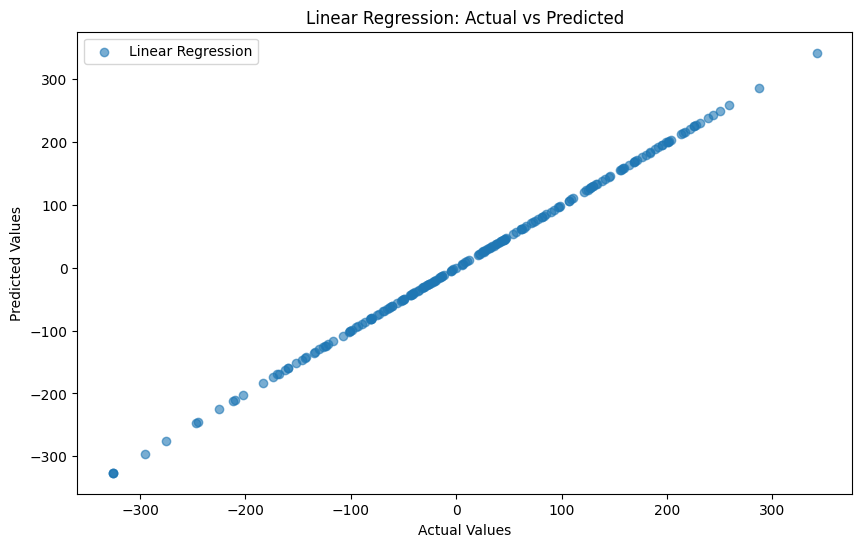

In [104]:
# Visualization of the Linear Regression line
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_lr, label='Linear Regression', alpha=0.6)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Linear Regression: Actual vs Predicted')
plt.legend()
plt.show()

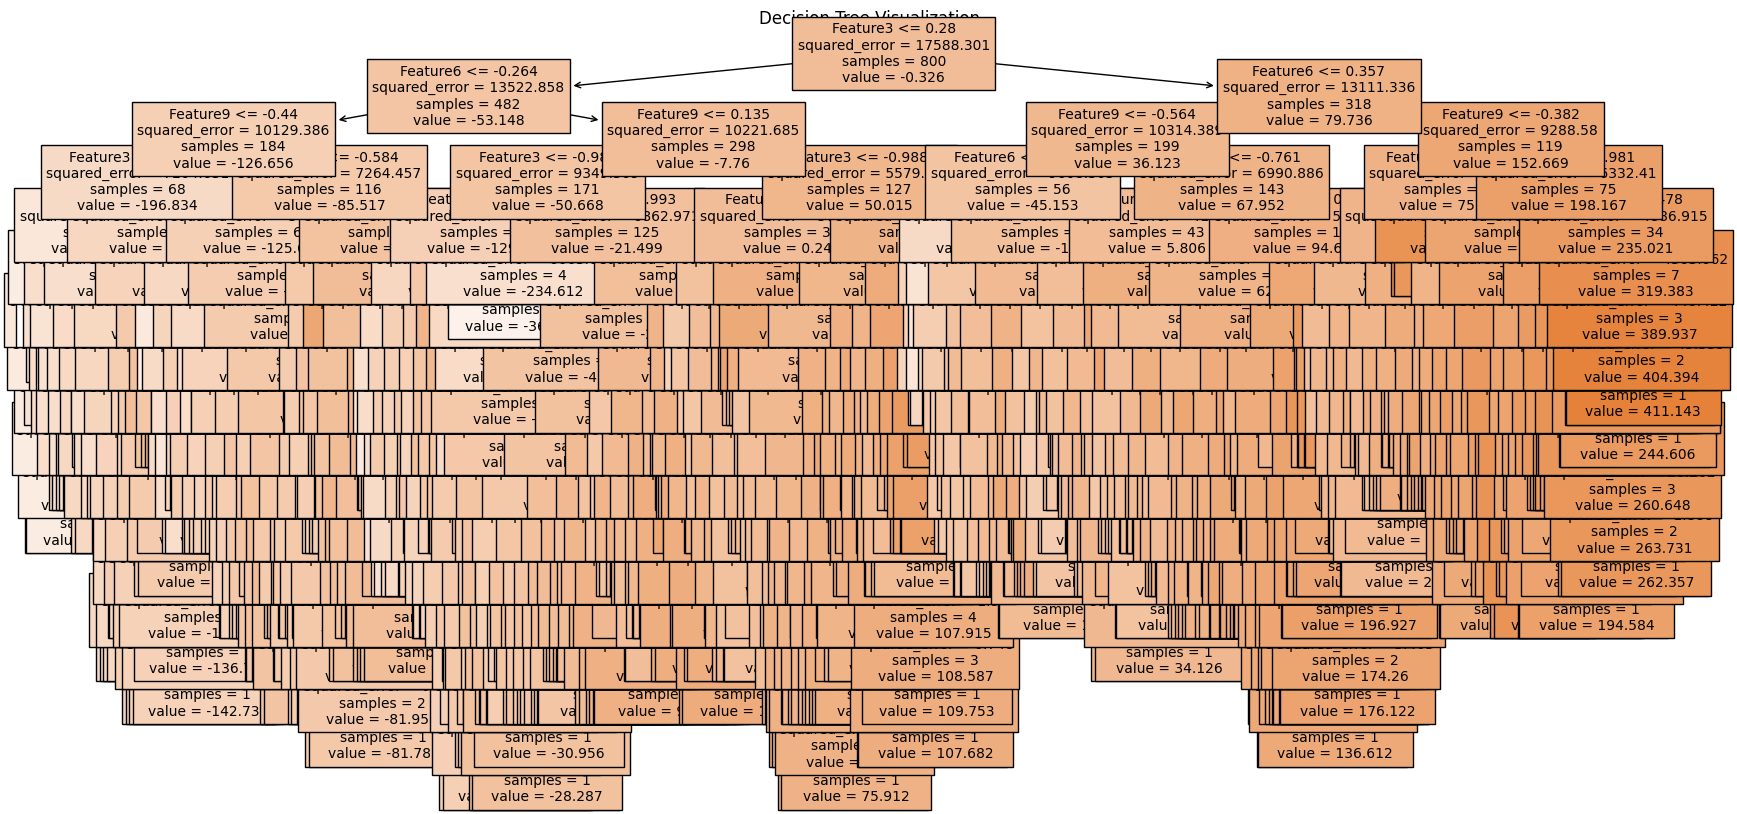

In [106]:
# Visualization of the Decision Tree
from sklearn.tree import DecisionTreeRegressor, plot_tree
plt.figure(figsize=(20, 10))
plot_tree(dt, filled=True, feature_names=[f'Feature{i}' for i in range(X.shape[1])], fontsize=10)
plt.title('Decision Tree Visualization')
plt.show()

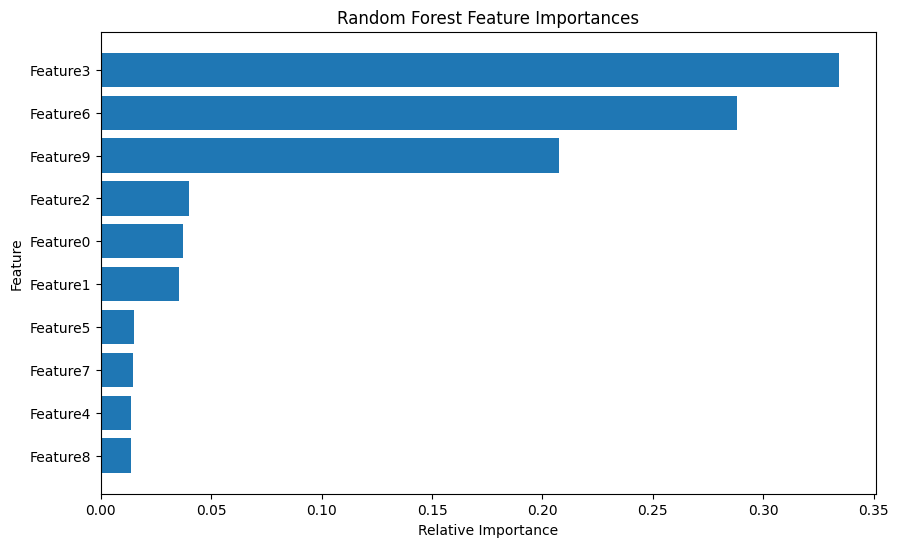

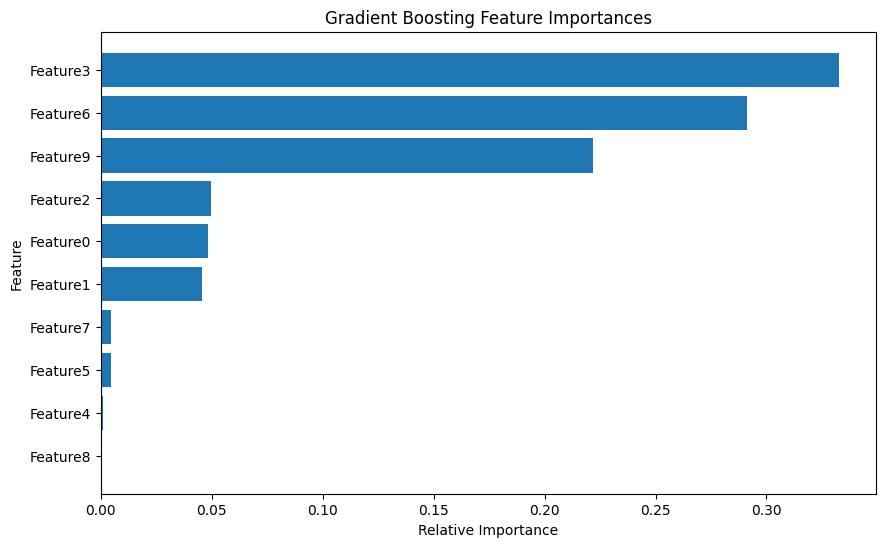

In [107]:
# Feature Importances for Random Forest and Gradient Boosting
features = [f'Feature{i}' for i in range(X.shape[1])]

def plot_feature_importances(model, model_name):
    plt.figure(figsize=(10, 6))
    importances = model.feature_importances_
    indices = np.argsort(importances)
    plt.barh(range(len(indices)), importances[indices], align='center')
    plt.yticks(range(len(indices)), [features[i] for i in indices])
    plt.title(f'{model_name} Feature Importances')
    plt.xlabel('Relative Importance')
    plt.ylabel('Feature')
    plt.show()

plot_feature_importances(rf, 'Random Forest')
plot_feature_importances(gb, 'Gradient Boosting')

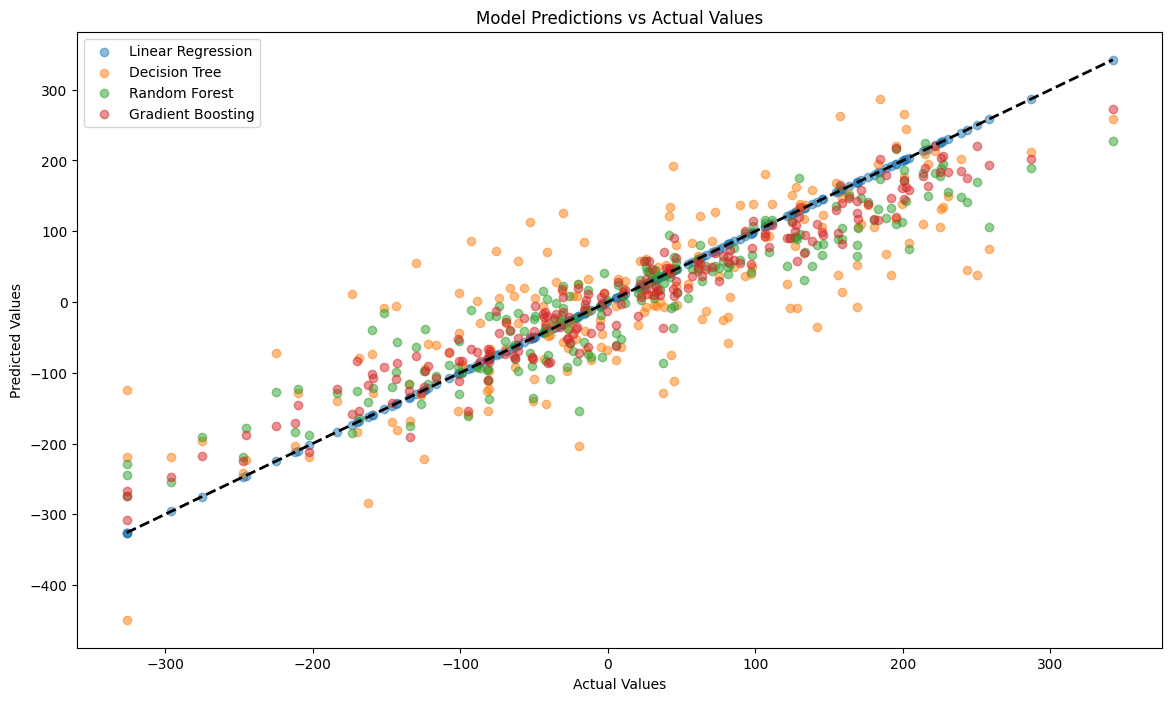

In [108]:
# Prediction vs Actual Values for all models
plt.figure(figsize=(14, 8))
plt.scatter(y_test, y_pred_lr, label='Linear Regression', alpha=0.5)
plt.scatter(y_test, y_pred_dt, label='Decision Tree', alpha=0.5)
plt.scatter(y_test, y_pred_rf, label='Random Forest', alpha=0.5)
plt.scatter(y_test, y_pred_gb, label='Gradient Boosting', alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'k--', lw=2)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Model Predictions vs Actual Values')
plt.legend()
plt.show()